<a href="https://colab.research.google.com/github/bmbuthia/benard/blob/main/Benard_Justus_AI_ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the file
df = pd.read_csv("/content/cvm_mnth_ml_data.csv",sep='|',on_bad_lines='skip')

In [ ]:
df.head(5)

,CUSTOMER_ID,ACQ_MNTH,SUB_AGE,GENDER,SALES_REGION,IS_MONTHLY_CVM_SUB,CVM3_OFFER,CVM4_OFFER,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,...,VOICE_OOB_DOPPVS_3M,VOICE_OKOA_DOPPVS_3M,VOICE_CVM_DOPPVS_3M,VOICE_NEO_DOPPVS_3M,TOTAL_VOICE_REVNPVS_3M,VOICE_DOP,DAILY_MEDIAN_VOIC_AMT,MAX_DAILY_VOICE_AMT,DAILY_MEDIAN_DATA_AMT,MAX_DAILY_DATA_AMT
0,1,202203,45.90,F,MT.KENYA,0,Sh250=2GB for 30 Days,Sh500=5GB for 30 Days,29.56,2146.51,...,6.00,15.00,0.00,0.0,515.35,15.00,33.59,80.25,38.07,109.20
1,2,202203,30.67,M,RIFT,1,Sh250=2GB for 30 Days,Sh500=5GB for 30 Days,12.42,1945.71,...,3.33,2.33,3.33,0.0,164.27,6.33,28.74,71.84,17.96,35.92
2,3,202203,31.55,M,MT.KENYA,0,Sh500=5GB for 30 Days,Sh1000=15GB for 30 Days,12.71,2902.63,...,5.50,8.50,0.50,0.0,108.39,10.00,12.45,17.70,5.03,17.24
3,4,202203,23.49,M,GREATER WESTERN,0,Sh2000=35GB for 30 Days,Sh2500=45GB for 30 Days,2.11,0.09,...,1.50,0.00,0.00,0.0,5.60,1.50,2.68,6.77,NaN,NaN
4,5,202203,59.69,F,GREATER WESTERN,1,Sh500=5GB for 30 Days,Sh1000=15GB for 30 Days,15.36,5372.46,...,3.33,4.00,3.00,0.0,45.20,7.67,5.83,24.44,20.11,80.46


In [ ]:
df.sample(5)

,CUSTOMER_ID,ACQ_MNTH,SUB_AGE,GENDER,SALES_REGION,IS_MONTHLY_CVM_SUB,CVM3_OFFER,CVM4_OFFER,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,...,VOICE_OOB_DOPPVS_3M,VOICE_OKOA_DOPPVS_3M,VOICE_CVM_DOPPVS_3M,VOICE_NEO_DOPPVS_3M,TOTAL_VOICE_REVNPVS_3M,VOICE_DOP,DAILY_MEDIAN_VOIC_AMT,MAX_DAILY_VOICE_AMT,DAILY_MEDIAN_DATA_AMT,MAX_DAILY_DATA_AMT
221907,221908,202204,46.78,M,NAIROBI EAST,0,Sh1500=25GB for 30 Days,Sh2000=35GB for 30 Days,25.67,3049.78,...,3.00,0.00,3.33,0.0,244.73,7.00,14.37,308.41,378.19,684.54
303914,303915,202204,41.52,M,NAIROBI WEST,1,Sh250=2GB for 30 Days,Sh500=5GB for 30 Days,16.45,1185.56,...,22.67,1.00,1.33,0.0,268.20,23.00,7.73,44.56,46.70,179.60
646370,646371,202207,20.88,M,NAIROBI EAST,0,NaN,NaN,11.63,8642.18,...,1.50,2.50,0.50,0.5,61.37,3.50,20.94,33.91,16.16,79.02
220020,220021,202204,28.66,F,MT.KENYA,0,Sh2500=45GB for 30 Days,Sh3000=55GB for 30 Days,NaN,NaN,...,19.00,16.33,14.00,0.0,630.04,27.33,20.04,75.17,14.37,14.37
438488,438489,202205,36.53,M,NAIROBI EAST,1,Sh500=5GB for 30 Days,Sh1000=15GB for 30 Days,22.30,4851.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.92,79.02


In [ ]:
df.shape

(660406, 33)

In [ ]:
df.describe()

,CUSTOMER_ID,ACQ_MNTH,SUB_AGE,IS_MONTHLY_CVM_SUB,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,PVS_3M_AVG_DAILY_USG,PVS_3M_TOTAL_DATA_USG,PVS_3M_TOTAL_CVM_DATA_USG,PVS_3M_REVN_DATA_CVM_TOTAL,...,VOICE_OOB_DOPPVS_3M,VOICE_OKOA_DOPPVS_3M,VOICE_CVM_DOPPVS_3M,VOICE_NEO_DOPPVS_3M,TOTAL_VOICE_REVNPVS_3M,VOICE_DOP,DAILY_MEDIAN_VOIC_AMT,MAX_DAILY_VOICE_AMT,DAILY_MEDIAN_DATA_AMT,MAX_DAILY_DATA_AMT
count,660406.000000,660406.000000,660406.000000,660406.000000,591578.000000,5.915780e+05,591578.000000,5.915780e+05,401357.000000,394039.000000,...,565897.000000,565897.000000,565897.000000,565897.000000,565897.000000,565897.000000,565897.000000,565897.000000,516401.000000,516401.000000
mean,330203.500000,202204.592102,36.020596,0.459620,17.082803,4.120821e+03,200.238599,1.164150e+04,10110.974640,404.829489,...,8.049666,5.103964,4.111861,0.963796,371.579409,13.744641,27.637585,97.632300,51.124776,145.857359
std,190642.935275,1.592052,14.352237,0.498367,9.737370,1.132323e+04,422.114464,3.313066e+04,19404.994437,850.709567,...,7.474807,5.961825,6.115084,3.021352,595.458887,8.618300,99.541703,210.099504,699.552008,1138.619014
min,1.000000,202202.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.040000
25%,165102.250000,202203.000000,25.970000,0.000000,8.430000,2.401600e+02,22.490000,5.763100e+02,758.860000,43.100000,...,2.500000,0.000000,0.000000,0.000000,67.790000,6.330000,6.240000,27.300000,10.780000,25.140000
50%,330203.500000,202204.000000,32.890000,0.000000,17.090000,1.349930e+03,88.100000,3.610375e+03,3325.200000,150.860000,...,5.670000,3.000000,1.000000,0.000000,181.520000,12.670000,11.610000,48.590000,14.370000,51.010000
75%,495304.750000,202206.000000,43.680000,1.000000,26.310000,4.339010e+03,238.330000,1.200265e+04,11067.390000,438.220000,...,11.000000,8.000000,6.000000,0.330000,438.220000,20.670000,21.550000,92.180000,35.510000,99.860000
max,660406.000000,202207.000000,1953.920000,1.000000,31.000000,1.541574e+06,49728.180000,4.624721e+06,817585.580000,112887.930000,...,31.000000,30.670000,30.670000,30.670000,38733.980000,31.000000,6781.610000,39813.220000,487248.960000,756181.560000


In [ ]:
# Dropping customer id, Acq_Mnth
df = df.drop(columns = ['CUSTOMER_ID','ACQ_MNTH'])

In [ ]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.shape

(635222, 31)

In [ ]:
# Check null values
df.isna().sum()

SUB_AGE                            0
GENDER                         21858
SALES_REGION                   31268
IS_MONTHLY_CVM_SUB                 0
CVM3_OFFER                     14996
CVM4_OFFER                     34676
PVS_3M_AVG_DOU                 43665
PVS_3M_AVG_MNTH_USG            43665
PVS_3M_AVG_DAILY_USG           43665
PVS_3M_TOTAL_DATA_USG          43665
PVS_3M_TOTAL_CVM_DATA_USG     233865
PVS_3M_REVN_DATA_CVM_TOTAL    241184
PVS_3M_REVN_DATA_CVM_AVG      241184
AVG_CVM_DOP                   118828
AVG_MNTH_TOTAL_DATA_REVN      118828
DATA_DOP_AVG                  118828
PVS_3M_REVN_DATA_TOTAL_AVG    118828
VOICE_OOB_3MPVS_3M            103686
VOICE_OKOAPVS_3M              216203
VOICE_CVMPVS_3M               277724
VOICE_NEOPVS_3M               477149
VOICE_OOB_DOPPVS_3M            69384
VOICE_OKOA_DOPPVS_3M           69384
VOICE_CVM_DOPPVS_3M            69384
VOICE_NEO_DOPPVS_3M            69384
TOTAL_VOICE_REVNPVS_3M         69384
VOICE_DOP                      69384
D

In [ ]:
# Drop records with missing Gender or Sales Region
df = df.dropna(subset=['GENDER'])
df = df.dropna(subset=['SALES_REGION'])

In [ ]:
df.shape

(584391, 31)

In [ ]:
# Replace missing CVM3_OFFER with default offer Sh3000=40GB for 30 Days
df['CVM3_OFFER'].fillna(value='Sh3000=40GB for 30 Days', inplace=True)

In [ ]:
df = df.drop(columns = ['CVM4_OFFER'])

In [ ]:
df.sample(5)

,SUB_AGE,GENDER,SALES_REGION,IS_MONTHLY_CVM_SUB,CVM3_OFFER,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,PVS_3M_AVG_DAILY_USG,PVS_3M_TOTAL_DATA_USG,PVS_3M_TOTAL_CVM_DATA_USG,...,VOICE_OOB_DOPPVS_3M,VOICE_OKOA_DOPPVS_3M,VOICE_CVM_DOPPVS_3M,VOICE_NEO_DOPPVS_3M,TOTAL_VOICE_REVNPVS_3M,VOICE_DOP,DAILY_MEDIAN_VOIC_AMT,MAX_DAILY_VOICE_AMT,DAILY_MEDIAN_DATA_AMT,MAX_DAILY_DATA_AMT
171551,25.86,F,NAIROBI WEST,1,Sh500=5GB for 30 Days,27.75,2875.23,103.61,8625.70,5979.52,...,0.33,1.33,0.0,12.67,831.24,13.33,67.82,101.72,12.93,179.60
251553,21.06,M,NAIROBI WEST,1,Sh250=2GB for 30 Days,13.94,4258.61,305.48,12775.82,11489.61,...,13.33,0.00,0.0,0.00,55.78,13.67,2.51,28.98,14.37,118.53
178928,22.98,F,RIFT,1,Sh250=2GB for 30 Days,2.37,334.43,141.17,1003.30,NaN,...,2.00,3.50,0.0,0.00,17.54,4.00,4.35,9.65,25.86,27.30
490012,23.66,M,NAIROBI EAST,1,Sh250=2GB for 30 Days,29.29,1596.38,54.50,4789.14,415.92,...,16.00,1.00,0.0,0.33,140.39,17.00,3.73,96.31,71.84,179.60
548367,27.62,F,NAIROBI EAST,0,Sh1000=15GB for 30 Days,10.80,2336.44,216.34,7009.32,6615.90,...,22.33,18.33,0.0,0.00,2034.08,29.00,38.62,386.28,28.74,57.47


In [ ]:
# Check null values 
df.isna().sum()

SUB_AGE                            0
GENDER                             0
SALES_REGION                       0
IS_MONTHLY_CVM_SUB                 0
CVM3_OFFER                         0
PVS_3M_AVG_DOU                 23279
PVS_3M_AVG_MNTH_USG            23279
PVS_3M_AVG_DAILY_USG           23279
PVS_3M_TOTAL_DATA_USG          23279
PVS_3M_TOTAL_CVM_DATA_USG     201791
PVS_3M_REVN_DATA_CVM_TOTAL    208505
PVS_3M_REVN_DATA_CVM_AVG      208505
AVG_CVM_DOP                    96298
AVG_MNTH_TOTAL_DATA_REVN       96298
DATA_DOP_AVG                   96298
PVS_3M_REVN_DATA_TOTAL_AVG     96298
VOICE_OOB_3MPVS_3M             75870
VOICE_OKOAPVS_3M              179472
VOICE_CVMPVS_3M               241353
VOICE_NEOPVS_3M               433968
VOICE_OOB_DOPPVS_3M            47617
VOICE_OKOA_DOPPVS_3M           47617
VOICE_CVM_DOPPVS_3M            47617
VOICE_NEO_DOPPVS_3M            47617
TOTAL_VOICE_REVNPVS_3M         47617
VOICE_DOP                      47617
DAILY_MEDIAN_VOIC_AMT          47617
M

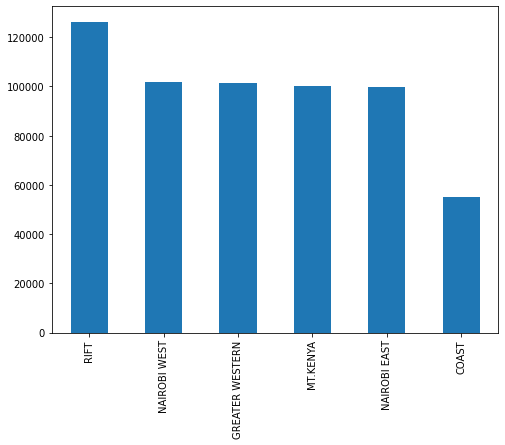

In [ ]:
# distribution of all customers by region
plt.figure(figsize = (8, 6))
df.SALES_REGION.value_counts().plot(kind = 'bar')
plt.show()

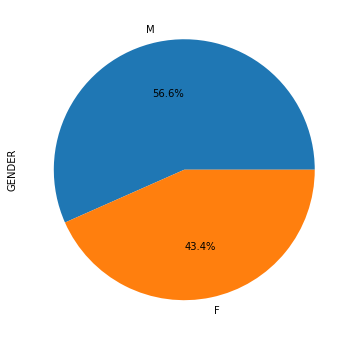

In [ ]:
# Customers Distribution by Gender
plt.figure(figsize = (6, 6))
df.GENDER.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

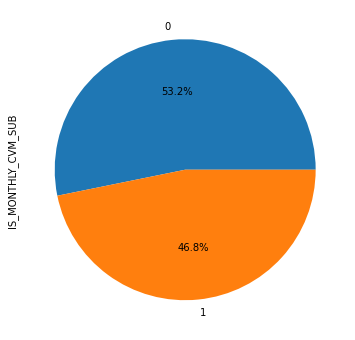

In [ ]:
# Customers Distribution by Status of Subscription to the Monthly Offers
plt.figure(figsize = (6, 6))
df.IS_MONTHLY_CVM_SUB.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

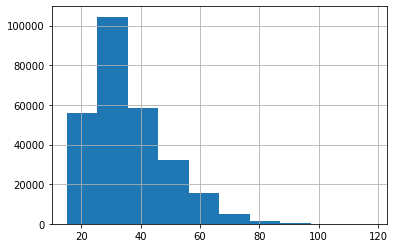

In [ ]:
# histogram of Monthly Offers Subscribers by Age. Exclude subs below 15 and over 120 years
df[(df["IS_MONTHLY_CVM_SUB"]==1) & (df['SUB_AGE'] > 15) & (df['SUB_AGE'] < 120)].SUB_AGE.hist(bins=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


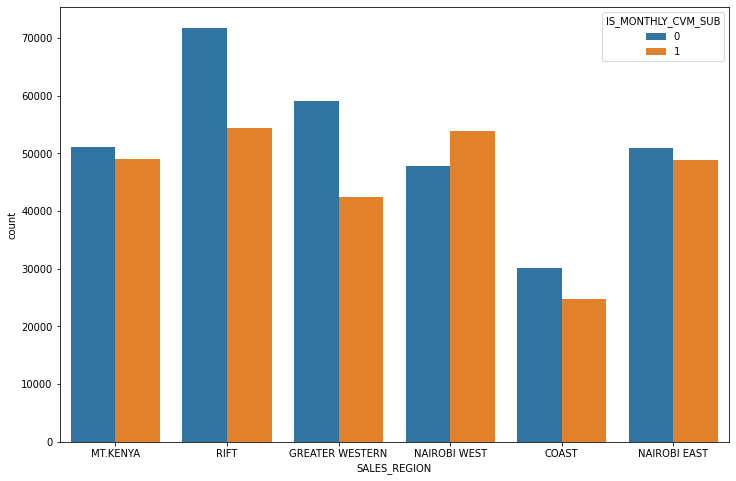

In [ ]:
# region by is monthly bundle subscriber
plt.figure(figsize = (12, 8))
sns.countplot('SALES_REGION', hue = 'IS_MONTHLY_CVM_SUB', data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


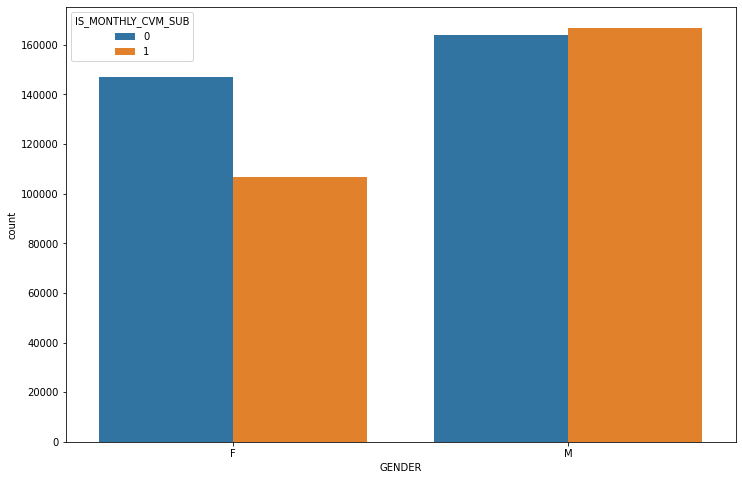

In [ ]:
# Gender By Subscription to Monthly Bundles Status
plt.figure(figsize = (12, 8))
sns.countplot('GENDER', hue = 'IS_MONTHLY_CVM_SUB', data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


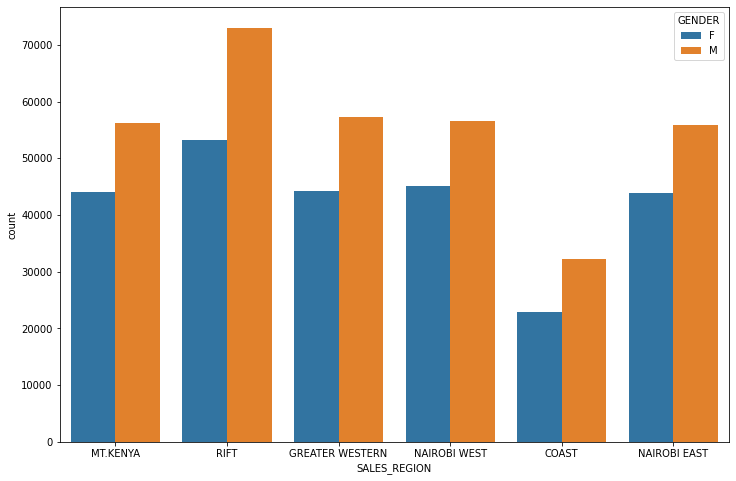

In [ ]:
# Customers By Region and Gender
plt.figure(figsize = (12, 8))
sns.countplot('SALES_REGION', hue = 'GENDER', data = df)
plt.show()

In [ ]:
# Fill the missing numerical variables with Zeros
df.fillna(value=0, inplace=True)

In [ ]:
df.shape

(584391, 30)

In [ ]:
# Check null values 
df.isna().sum()

SUB_AGE                       0
GENDER                        0
SALES_REGION                  0
IS_MONTHLY_CVM_SUB            0
CVM3_OFFER                    0
PVS_3M_AVG_DOU                0
PVS_3M_AVG_MNTH_USG           0
PVS_3M_AVG_DAILY_USG          0
PVS_3M_TOTAL_DATA_USG         0
PVS_3M_TOTAL_CVM_DATA_USG     0
PVS_3M_REVN_DATA_CVM_TOTAL    0
PVS_3M_REVN_DATA_CVM_AVG      0
AVG_CVM_DOP                   0
AVG_MNTH_TOTAL_DATA_REVN      0
DATA_DOP_AVG                  0
PVS_3M_REVN_DATA_TOTAL_AVG    0
VOICE_OOB_3MPVS_3M            0
VOICE_OKOAPVS_3M              0
VOICE_CVMPVS_3M               0
VOICE_NEOPVS_3M               0
VOICE_OOB_DOPPVS_3M           0
VOICE_OKOA_DOPPVS_3M          0
VOICE_CVM_DOPPVS_3M           0
VOICE_NEO_DOPPVS_3M           0
TOTAL_VOICE_REVNPVS_3M        0
VOICE_DOP                     0
DAILY_MEDIAN_VOIC_AMT         0
MAX_DAILY_VOICE_AMT           0
DAILY_MEDIAN_DATA_AMT         0
MAX_DAILY_DATA_AMT            0
dtype: int64

In [ ]:
df.describe()

,SUB_AGE,IS_MONTHLY_CVM_SUB,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,PVS_3M_AVG_DAILY_USG,PVS_3M_TOTAL_DATA_USG,PVS_3M_TOTAL_CVM_DATA_USG,PVS_3M_REVN_DATA_CVM_TOTAL,PVS_3M_REVN_DATA_CVM_AVG,AVG_CVM_DOP,...,VOICE_OOB_DOPPVS_3M,VOICE_OKOA_DOPPVS_3M,VOICE_CVM_DOPPVS_3M,VOICE_NEO_DOPPVS_3M,TOTAL_VOICE_REVNPVS_3M,VOICE_DOP,DAILY_MEDIAN_VOIC_AMT,MAX_DAILY_VOICE_AMT,DAILY_MEDIAN_DATA_AMT,MAX_DAILY_DATA_AMT
count,584391.000000,584391.000000,584391.000000,5.843910e+05,584391.000000,5.843910e+05,584391.000000,584391.000000,584391.000000,584391.000000,...,584391.000000,584391.000000,584391.000000,584391.000000,584391.000000,584391.000000,584391.000000,584391.000000,584391.000000,584391.000000
mean,36.168571,0.468051,16.337615,3.749846e+03,185.274759,1.056790e+04,6554.502531,256.082766,104.621695,3.959795,...,7.370919,4.770269,3.782846,0.880165,324.201886,12.603749,22.852807,83.160313,38.201175,111.444356
std,13.875532,0.498979,10.091398,8.588969e+03,339.727539,2.508316e+04,16214.715145,698.335757,255.187072,5.924214,...,7.404317,5.876729,5.931566,2.890612,539.753908,8.993799,83.522950,175.280194,143.829993,289.156117
min,0.230000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.200000,0.000000,7.250000,1.676750e+02,16.725000,3.971500e+02,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,45.940000,5.000000,4.810000,20.800000,6.470000,14.370000
50%,33.160000,0.000000,16.280000,1.193730e+03,79.760000,3.172400e+03,677.990000,35.920000,23.350000,1.000000,...,5.000000,2.330000,1.000000,0.000000,150.840000,11.500000,9.800000,43.070000,14.370000,35.920000
75%,43.680000,1.000000,25.860000,4.031640e+03,224.480000,1.111987e+04,5831.880000,240.660000,108.960000,5.500000,...,10.330000,7.670000,5.330000,0.330000,384.740000,19.670000,19.330000,82.370000,28.020000,79.020000
max,1022.310000,1.000000,31.000000,1.019259e+06,32879.310000,3.057776e+06,817585.580000,112887.930000,37629.310000,31.000000,...,31.000000,30.670000,30.670000,30.670000,26838.450000,31.000000,6781.610000,10380.750000,12176.510000,58908.050000


In [ ]:
# Exclude records with sub age < 15 and over 120
df = df[~((df['SUB_AGE'] < 15) |(df['SUB_AGE'] > 120))]

In [ ]:
#One Hot Encoding Gender
y = pd.get_dummies(df.GENDER, prefix='GENDER')
df = df.join(y)
df = df.drop(columns = ['GENDER'])
df = df.iloc[: , :-1]

In [ ]:
#One Hot Encoding sales region
y = pd.get_dummies(df.SALES_REGION, prefix='REGION')
df = df.join(y)
df = df.drop(columns = ['SALES_REGION'])
df = df.iloc[: , :-1]

In [ ]:
df["CVM3_OFFER"]=df["CVM3_OFFER"].str.replace(" for 30 Days","").str.replace("=","_")
df.head(2)

,SUB_AGE,IS_MONTHLY_CVM_SUB,CVM3_OFFER,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,PVS_3M_AVG_DAILY_USG,PVS_3M_TOTAL_DATA_USG,PVS_3M_TOTAL_CVM_DATA_USG,PVS_3M_REVN_DATA_CVM_TOTAL,PVS_3M_REVN_DATA_CVM_AVG,...,DAILY_MEDIAN_VOIC_AMT,MAX_DAILY_VOICE_AMT,DAILY_MEDIAN_DATA_AMT,MAX_DAILY_DATA_AMT,GENDER_F,REGION_COAST,REGION_GREATER WESTERN,REGION_MT.KENYA,REGION_NAIROBI EAST,REGION_NAIROBI WEST
0,45.90,0,Sh250_2GB,29.56,2146.51,72.62,6439.53,4365.31,352.01,352.01,...,33.59,80.25,38.07,109.20,1,0,0,1,0,0
1,30.67,1,Sh250_2GB,12.42,1945.71,156.70,5837.12,5064.77,337.64,168.82,...,28.74,71.84,17.96,35.92,0,0,0,0,0,0


In [ ]:
#One Hot Encoding CVM3_OFFER
y = pd.get_dummies(df.CVM3_OFFER, prefix='CVM3_OFFER')
df = df.join(y)
df = df.drop(columns = ['CVM3_OFFER'])
df = df.iloc[: , :-1]

In [ ]:
df.head(2)

,SUB_AGE,IS_MONTHLY_CVM_SUB,PVS_3M_AVG_DOU,PVS_3M_AVG_MNTH_USG,PVS_3M_AVG_DAILY_USG,PVS_3M_TOTAL_DATA_USG,PVS_3M_TOTAL_CVM_DATA_USG,PVS_3M_REVN_DATA_CVM_TOTAL,PVS_3M_REVN_DATA_CVM_AVG,AVG_CVM_DOP,...,REGION_MT.KENYA,REGION_NAIROBI EAST,REGION_NAIROBI WEST,CVM3_OFFER_Sh1000_15GB,CVM3_OFFER_Sh1500_25GB,CVM3_OFFER_Sh2000_35GB,CVM3_OFFER_Sh2500_45GB,CVM3_OFFER_Sh250_2GB,CVM3_OFFER_Sh3000_40GB,CVM3_OFFER_Sh3000_55GB
0,45.90,0,29.56,2146.51,72.62,6439.53,4365.31,352.01,352.01,12.0,...,1,0,0,0,0,0,0,1,0,0
1,30.67,1,12.42,1945.71,156.70,5837.12,5064.77,337.64,168.82,9.5,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
cols = ['SUB_AGE','PVS_3M_AVG_DOU','PVS_3M_AVG_MNTH_USG','PVS_3M_AVG_DAILY_USG','PVS_3M_TOTAL_DATA_USG','PVS_3M_TOTAL_CVM_DATA_USG','PVS_3M_REVN_DATA_CVM_TOTAL','PVS_3M_REVN_DATA_CVM_AVG','AVG_CVM_DOP','AVG_MNTH_TOTAL_DATA_REVN','DATA_DOP_AVG','PVS_3M_REVN_DATA_TOTAL_AVG','VOICE_OOB_3MPVS_3M','VOICE_OKOAPVS_3M','VOICE_CVMPVS_3M','VOICE_NEOPVS_3M','VOICE_OOB_DOPPVS_3M','VOICE_OKOA_DOPPVS_3M','VOICE_CVM_DOPPVS_3M','VOICE_NEO_DOPPVS_3M','TOTAL_VOICE_REVNPVS_3M','VOICE_DOP','DAILY_MEDIAN_VOIC_AMT','MAX_DAILY_VOICE_AMT','DAILY_MEDIAN_DATA_AMT','MAX_DAILY_DATA_AMT',] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1



In [ ]:
col_name = cols[0]
q1 = df[col_name].quantile(0.25)
q1 = df[col_name].quantile(0.25)
q3 = df[col_name].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

In [ ]:
df_IQR = pd.DataFrame(columns = ["var", "q1", "q3","iqr","fence_low","fence_high","outliers"])

In [ ]:
df_IQR.head()

,var,q1,q3,iqr,fence_low,fence_high,outliers


In [ ]:
# Checking the intequartile distribution of the variables

i=0

while i<len(cols):
    col_name = cols[i]
#     q1 = df[col_name].quantile(0.25)
    dfn=df[(df[col_name] >0)]
    q1 = dfn[col_name].quantile(0.25)
#     q3 = df[col_name].quantile(0.75)
    q3 = dfn[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
#     df_out = df[((df[col_name] < (q1 - 1.5 * iqr)) |(df[col_name] > (q3 + 1.5 * iqr))).any(axis=1)]

#     df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    df_out = df[((df[col_name] < (q1 - 1.5 * iqr)) |(df[col_name] > (q3 + 1.5 * iqr)))]
    df_IQR.loc[i] = [col_name, q1, q3,iqr,fence_low,fence_high,df_out.shape[0]]
    i=i+1 

df_IQR

,var,q1,q3,iqr,fence_low,fence_high,outliers
0,SUB_AGE,26.220,43.6800,17.4600,0.03000,69.87000,9907
1,PVS_3M_AVG_DOU,8.360,26.2300,17.8700,-18.44500,53.03500,0
2,PVS_3M_AVG_MNTH_USG,262.060,4300.5750,4038.5150,-5795.71250,10358.34750,54379
3,PVS_3M_AVG_DAILY_USG,24.980,238.6100,213.6300,-295.46500,559.05500,45677
4,PVS_3M_TOTAL_DATA_USG,623.935,11853.4675,11229.5325,-16220.36375,28697.76625,55628
5,PVS_3M_TOTAL_CVM_DATA_USG,757.455,11000.4350,10242.9800,-14607.01500,26364.90500,38734
6,PVS_3M_REVN_DATA_CVM_TOTAL,43.100,431.0300,387.9300,-538.79500,1012.92500,35890
7,PVS_3M_REVN_DATA_CVM_AVG,28.740,183.1900,154.4500,-202.93500,414.86500,34301
8,AVG_CVM_DOP,1.330,9.0000,7.6700,-10.17500,20.50500,18334
9,AVG_MNTH_TOTAL_DATA_REVN,53.880,331.6600,277.7800,-362.79000,748.33000,43297


In [ ]:
df.shape

(583632, 40)

In [ ]:
# Excluding records with outlier customer's age
q1 = df["SUB_AGE"].quantile(0.25)
q3 = df["SUB_AGE"].quantile(0.75)
iqr = q3-q1
df = df[~((df["SUB_AGE"] < (q1 - 1.5 * iqr)) |
          (df["SUB_AGE"] > (q3 + 1.5 * iqr)))]

In [ ]:
df.shape

(573725, 40)

In [ ]:
df.isna().sum()

SUB_AGE                       0
IS_MONTHLY_CVM_SUB            0
PVS_3M_AVG_DOU                0
PVS_3M_AVG_MNTH_USG           0
PVS_3M_AVG_DAILY_USG          0
PVS_3M_TOTAL_DATA_USG         0
PVS_3M_TOTAL_CVM_DATA_USG     0
PVS_3M_REVN_DATA_CVM_TOTAL    0
PVS_3M_REVN_DATA_CVM_AVG      0
AVG_CVM_DOP                   0
AVG_MNTH_TOTAL_DATA_REVN      0
DATA_DOP_AVG                  0
PVS_3M_REVN_DATA_TOTAL_AVG    0
VOICE_OOB_3MPVS_3M            0
VOICE_OKOAPVS_3M              0
VOICE_CVMPVS_3M               0
VOICE_NEOPVS_3M               0
VOICE_OOB_DOPPVS_3M           0
VOICE_OKOA_DOPPVS_3M          0
VOICE_CVM_DOPPVS_3M           0
VOICE_NEO_DOPPVS_3M           0
TOTAL_VOICE_REVNPVS_3M        0
VOICE_DOP                     0
DAILY_MEDIAN_VOIC_AMT         0
MAX_DAILY_VOICE_AMT           0
DAILY_MEDIAN_DATA_AMT         0
MAX_DAILY_DATA_AMT            0
GENDER_F                      0
REGION_COAST                  0
REGION_GREATER WESTERN        0
REGION_MT.KENYA               0
REGION_N

In [ ]:
# Check the data types
df.dtypes

SUB_AGE                       float64
IS_MONTHLY_CVM_SUB              int64
PVS_3M_AVG_DOU                float64
PVS_3M_AVG_MNTH_USG           float64
PVS_3M_AVG_DAILY_USG          float64
PVS_3M_TOTAL_DATA_USG         float64
PVS_3M_TOTAL_CVM_DATA_USG     float64
PVS_3M_REVN_DATA_CVM_TOTAL    float64
PVS_3M_REVN_DATA_CVM_AVG      float64
AVG_CVM_DOP                   float64
AVG_MNTH_TOTAL_DATA_REVN      float64
DATA_DOP_AVG                  float64
PVS_3M_REVN_DATA_TOTAL_AVG    float64
VOICE_OOB_3MPVS_3M            float64
VOICE_OKOAPVS_3M              float64
VOICE_CVMPVS_3M               float64
VOICE_NEOPVS_3M               float64
VOICE_OOB_DOPPVS_3M           float64
VOICE_OKOA_DOPPVS_3M          float64
VOICE_CVM_DOPPVS_3M           float64
VOICE_NEO_DOPPVS_3M           float64
TOTAL_VOICE_REVNPVS_3M        float64
VOICE_DOP                     float64
DAILY_MEDIAN_VOIC_AMT         float64
MAX_DAILY_VOICE_AMT           float64
DAILY_MEDIAN_DATA_AMT         float64
MAX_DAILY_DA

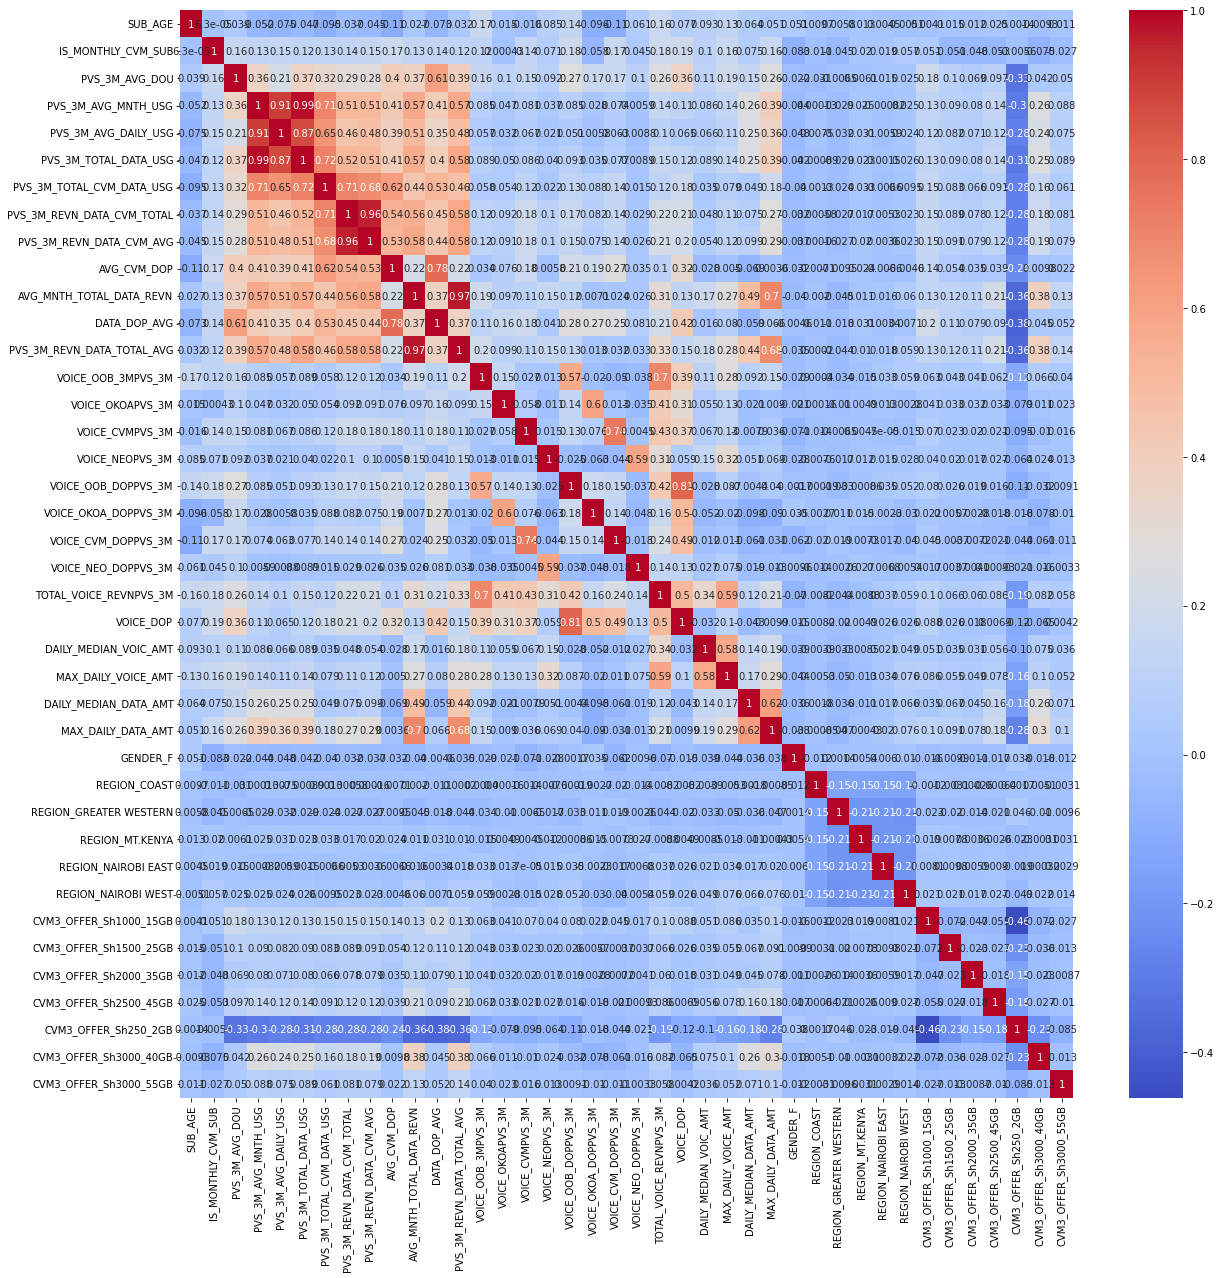

In [ ]:
# Testing multi-colinearlity
corr = df.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
corr_matrix = df.corr().abs()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                  k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns 
           if any(upper[column] > 0.9)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
to_drop

['PVS_3M_AVG_DAILY_USG',
 'PVS_3M_TOTAL_DATA_USG',
 'PVS_3M_REVN_DATA_CVM_AVG',
 'PVS_3M_REVN_DATA_TOTAL_AVG']

In [ ]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

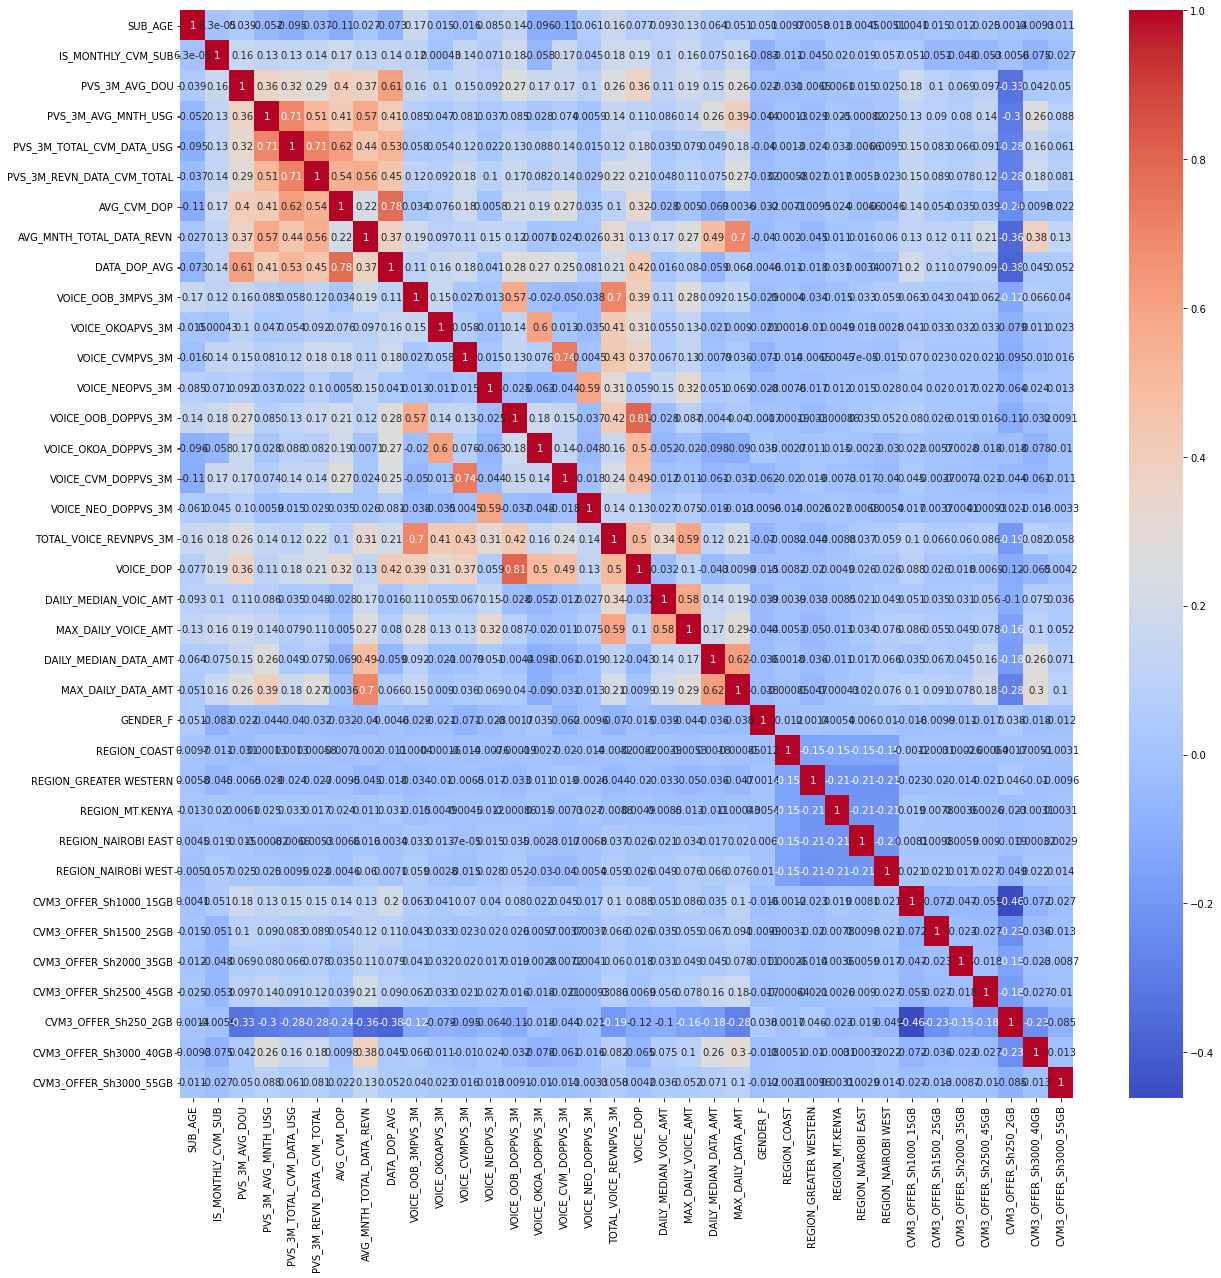

In [ ]:
# Recheck correlation matrix
corr = df.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

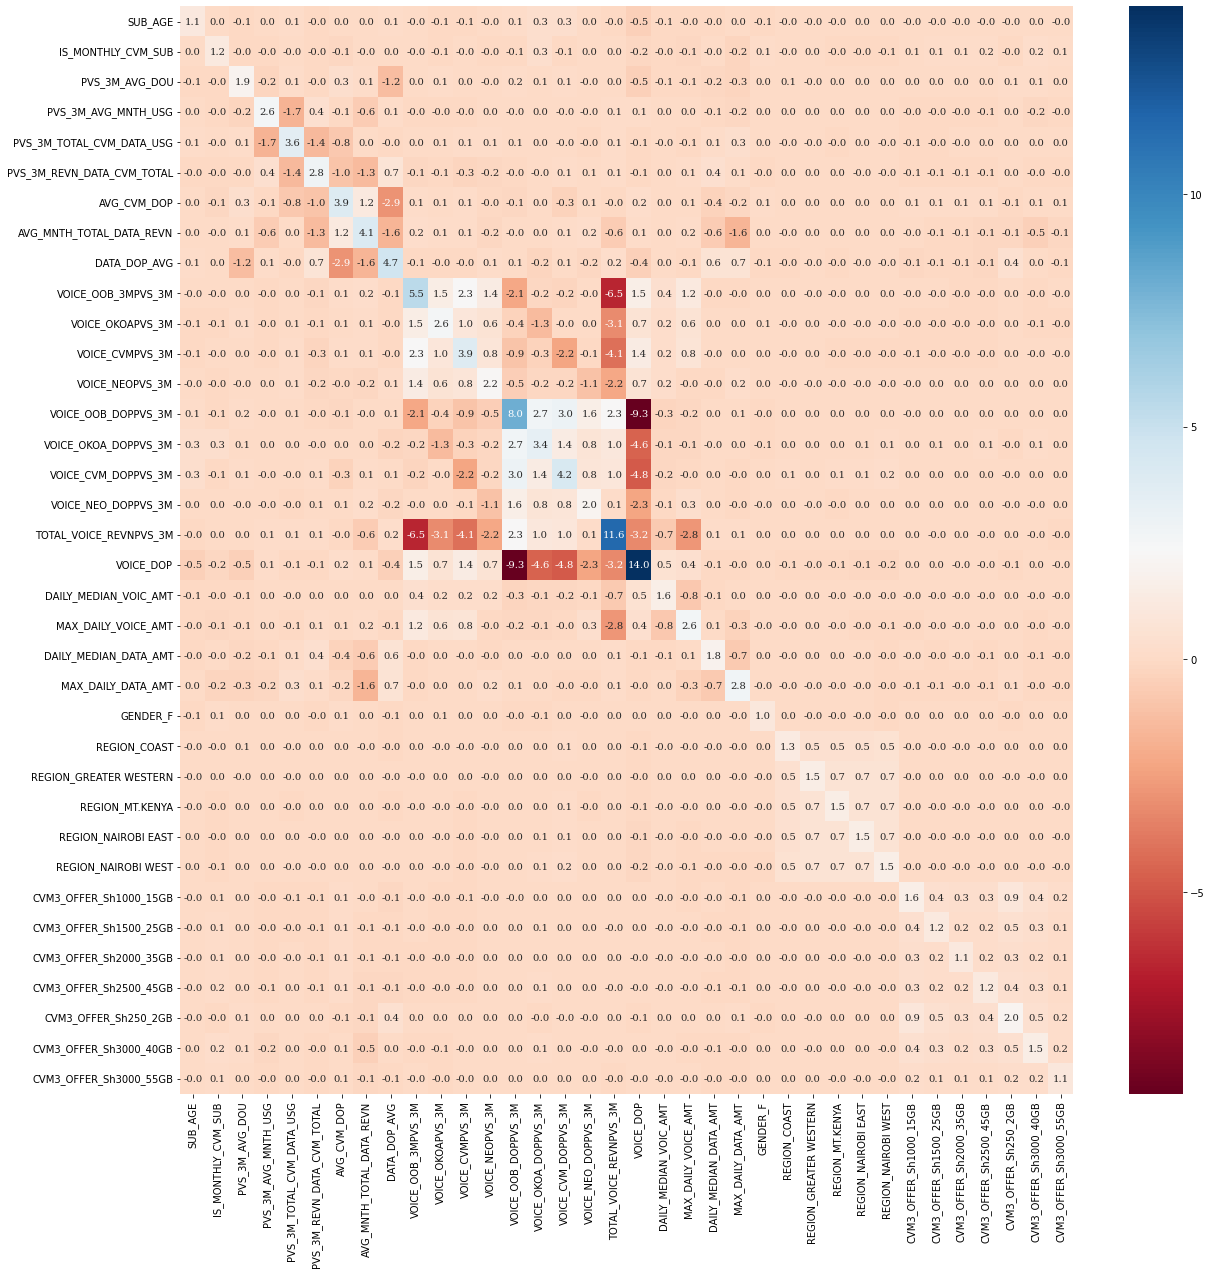

In [ ]:
# heatmap of VIF
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

plt.figure(figsize = (20, 20))
sns.heatmap(vif, annot = True, cmap="RdBu", fmt=".1f", annot_kws={
    'fontsize':10,
    'fontfamily': 'serif'
})
plt.show()

In [ ]:
# dividing our dataset into features (X) and target (y)
X = np.array(df.drop(columns = ['IS_MONTHLY_CVM_SUB']))
y = np.array(df['IS_MONTHLY_CVM_SUB'])

print(X.shape)
print(y.shape)

(573725, 35)
(573725,)


In [ ]:
# splitting into 80-20 train-test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# performing feature scaling on training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic: 0.711332 (0.001102)
decision_tree: 0.656399 (0.000901)
naive_bayes: 0.637241 (0.002083)
bagging: 0.720406 (0.000638)
random_forest: 0.746863 (0.001865)
adaboost: 0.737527 (0.001146)
gradient_boost: 0.744954 (0.001376)
xgb: 0.744782 (0.001050)
mlp: 0.752802 (0.001731)


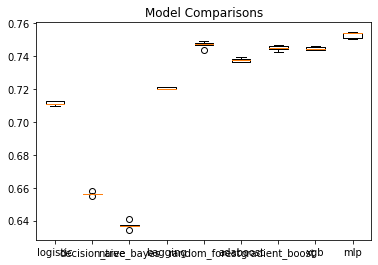

In [ ]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot

# Import Cross validation libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

models = []
models.append(('logistic', LogisticRegression()))
models.append(('decision_tree', DecisionTreeClassifier()))
models.append(('naive_bayes', GaussianNB()))
models.append(('bagging', BaggingClassifier()))
models.append(('random_forest', RandomForestClassifier()))
models.append(('adaboost', AdaBoostClassifier()))
models.append(('gradient_boost', GradientBoostingClassifier()))
models.append(('xgb', XGBClassifier()))
models.append(('mlp', MLPClassifier()))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Model Comparisons')
pyplot.show()  

In [ ]:
names, results

(['logistic',
  'decision_tree',
  'naive_bayes',
  'bagging',
  'random_forest',
  'adaboost',
  'gradient_boost',
  'xgb'],
 [array([0.70966055, 0.71258007, 0.71107674, 0.71251471, 0.71082618]),
  array([0.65547518, 0.65644473, 0.6545819 , 0.65694584, 0.6575232 ]),
  array([0.6370539 , 0.64085581, 0.63720641, 0.63673798, 0.63435226]),
  array([0.71978082, 0.72129505, 0.72005316, 0.7215456 , 0.72304893]),
  array([0.74503246, 0.74633971, 0.7470587 , 0.74821343, 0.74855114]),
  array([0.73618676, 0.73639374, 0.73784261, 0.73787529, 0.73933505]),
  array([0.74267942, 0.74434616, 0.74507604, 0.74611094, 0.74655758]),
  array([0.74372522, 0.743747  , 0.74443331, 0.7456643 , 0.74633971])])

(573725, 30)
(573725,)
logistic: 0.710985 (0.001117)
decision_tree: 0.638505 (0.001364)
naive_bayes: 0.645542 (0.002707)
bagging: 0.702307 (0.001364)
random_forest: 0.729446 (0.000959)
adaboost: 0.706767 (0.000297)
gradient_boost: 0.719251 (0.000767)
xgb: 0.718805 (0.000697)
mlp: 0.750695 (0.001417)


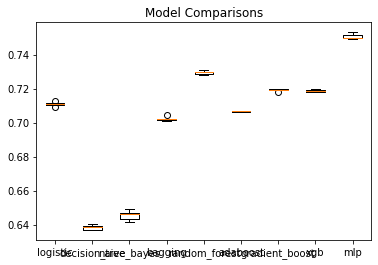

In [ ]:
# Comparing the models performance with dimensions reduction using PCA.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(columns = ['IS_MONTHLY_CVM_SUB']))

StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaler.transform(df.drop(columns = ['IS_MONTHLY_CVM_SUB']))

from sklearn.decomposition import PCA
pca = PCA(n_components=30)

pca.fit(scaled_data)
PCA(copy=True, n_components=30, whiten=False)

x_pca = pca.transform(scaled_data)

Xp = np.array(x_pca)
yp = np.array(df['IS_MONTHLY_CVM_SUB'])

print(Xp.shape)
print(yp.shape)

from sklearn.model_selection import train_test_split
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size = 0.2, random_state = 0)


results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, Xp_train, yp_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Model Comparisons')
pyplot.show()  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


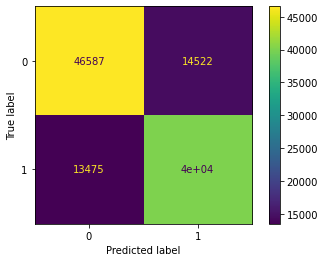

In [ ]:
# Plotting the Confusion Matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

mlp_c = MLPClassifier()
mlp_c.fit(X_train, y_train)


In [ ]:
# Hyperparameter Tuning with GridSearchCV

